[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/Week%205.ipynb)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/My Drive/COMP30027 (T)/W5/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Week 5 - `sklearn`: Basic classifiers and train-test splitting

Today, we will be using `scikit-learn` again to learn more about Baselines, Decision Trees and Nearest Neighbourhood classifiers:

1. Load the data
1. Baseline
2. 1R and Decision Tree
3. Nearest Neighbor
5. Hold-out
6. Cross validation

### Exercise 1. 
Load the `IRIS` dataset as follows (Note that there are some small differences between this dataset and the one we were looking at last week, most notably, the errors that we needed to fix are not present):

In [ ]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt
iris = datasets.load_iris()

- **(a)** Identify the contents of the complex data type `IRIS` , for example iris.DESCR contains a long description of the dataset, which you can `print()`.

In [ ]:
#print(iris)
print(dir(iris))
#print(iris.DESCR)
#print(iris.data.shape)
#print(iris.target.shape)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


- **(b)** The common terminology in scikit-learn is that the array defining the attribute values is called X and the array defining the “ground truth” labels is called y ; create these variables for the Iris data.

In [ ]:
X = iris.data
y = iris.target

- **(c)** Confirm that X is a 2-dimensional array, with a row for each instance and a column for each attribute. (Hint: read about the `shape` property in numpy .)

In [ ]:
print("X.shape {} y.shape {}".format(X.shape, y.shape))

X.shape (150, 4) y.shape (150,)


### Exercise 2.
Let’s build a 0-R classifier (“majority class classifier”). In scikit-learn , this is a `DummyClassifier`. 

**Note** `scikit-learn` uses this terminology to help remind you not to use these sorts of classifiers when trying to solve real problems; However they are easy **baseline classifiers** and are quite useful.

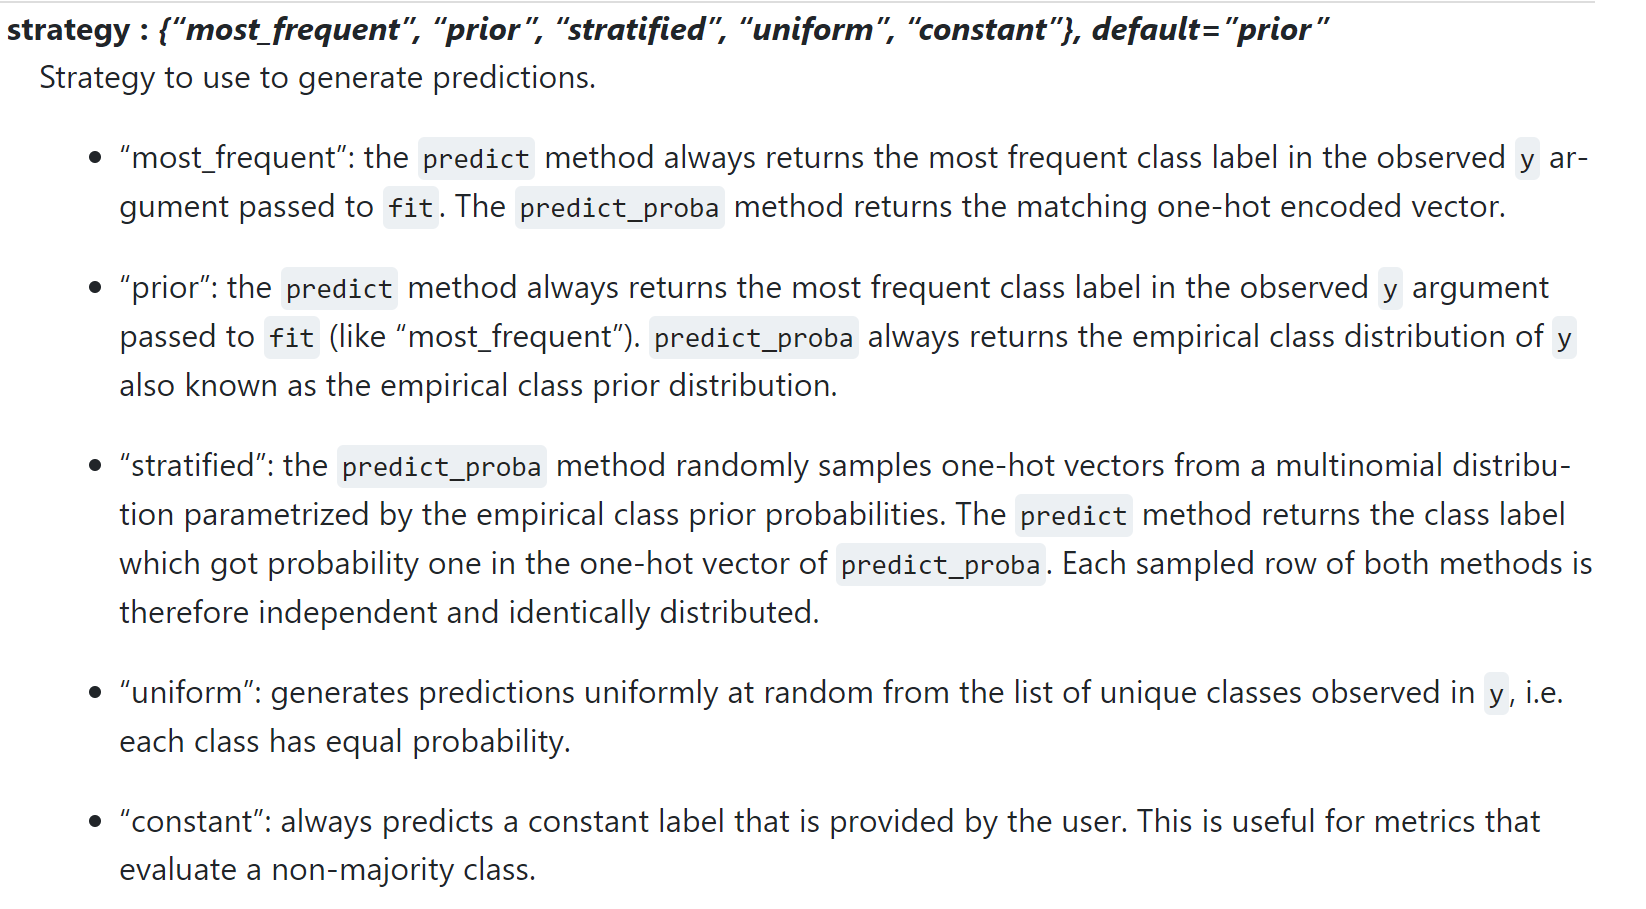

In [ ]:
from sklearn.dummy import DummyClassifier
zero_r = DummyClassifier(strategy='most_frequent')
zero_r.fit(X, y)

DummyClassifier(strategy='most_frequent')

- **(a)** Confirm that this is a typical 0-R classifier by checking its predictions on the training data: `zero_r.predict(X)` — which class has it chosen?

In [ ]:
zr_pred = zero_r.predict(X)
print(zr_pred)
label_counter = Counter(y)
label_counter.most_common()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


[(0, 50), (1, 50), (2, 50)]

Everything is a number, as far as scikit-learn is concerned - so it's a little difficult to know which class label this is. On the other hand, each of the classes is equally likely, so the method appears to have chosen the "0th" class arbitrarily.

- **(b)** The default evaluation metric associated with a `DummyClassifier` is `accuracy`, which you can observe using `score()` , for example: `zero_r.score(X, y)`. This strategy — building a model, and then evaluating on the data that we used to build the model — gives us something called “training accuracy”, and is generally frowned upon in the *Machine Learning* community. Why do you suppose this is? (We’ll examine some better techniques later.)

In [ ]:
print(zero_r.score(X, y))

0.3333333333333333


- **(c)** Contrast the `0-R classifier` with the “weighted random classifier”, which makes random predictions according to the distribution of classes in the training data; (`strategy='stratified'`) — check its predictions, and evaluate its training accuracy. Does it have a higher accuracy, on average, than `0-R`, or a `lower accuracy`? (You should run `score()` at least 10 times.)

In [ ]:
stratified_clf = DummyClassifier(strategy='stratified')
stratified_clf.fit(X, y)
accuracies = []
num_runs = 10
for i in range(num_runs):
    acc = stratified_clf.score(X, y)
    accuracies.append(acc)
print(accuracies)
print('Average accuracy over {} runs is: {}.'.format(num_runs, np.mean(accuracies)))

[0.3466666666666667, 0.32, 0.32666666666666666, 0.4066666666666667, 0.36, 0.32666666666666666, 0.31333333333333335, 0.31333333333333335, 0.31333333333333335, 0.3466666666666667]
Average accuracy over 10 runs is: 0.3373333333333334.


*10 runs isn't quite enough to be certain which of these methods has greater accuracy. In fact, they will generally produce the same accuracy for class distributions where all of the classes are equally likely - but it would require more than 10 iterations to really see this.*

### Exercise 3.
Let’s consider a couple of other classifiers: a `Decision Tree`, and `1-R` (which is really just a limited
`DecisionTreeClassifier` in `scikit-learn` ).

**NOTE:** `scikit-learn` implementation of `1-R` is slightly different to the lecture version, because it doesn’t count errors — rather it uses the **Gini coefficient** or the **Information Gain** to determine the best attribute.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X, y)
dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X, y)

DecisionTreeClassifier()

- **(a)** Find the training accuracy of the two classifiers.

In [ ]:
one_r_acc = one_r.score(X, y)
dt_acc = dt.score(X, y)
print("1-R accuracy: {}; DT accuracy: {}".format(one_r_acc, dt_acc))

1-R accuracy: 0.6666666666666666; DT accuracy: 1.0


*Unsurprisingly, the Decision Tree makes fewer errors when testing on the training data. The fact that the DT accuracy is 100% shows that every leaf has a homogeneous class distribution.*

- **(b)** The "`feature_importances_`" attribute is adequate for completely describing the 1-R classifier. Which attribute is being used to classify the data?

In [ ]:
importances = one_r.feature_importances_
# Get index of most important attribute
max_index = np.argmax(importances)
# Get the corresponding name
best_feature_name = iris.feature_names[max_index]
print(best_feature_name)

petal width (cm)


- **(c)** *(Harder)* Check the predicted labels for each instance to discern the values for this attribute that each class maps to.

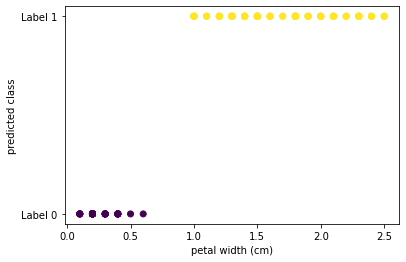

In [ ]:
# Labelling result
ybar = one_r.predict(X)
# Remember that we have the best att's index already
best_feature = X[:, max_index]

# Just plot that feature out
plt.scatter(best_feature, ybar, c=ybar)
plt.xlabel(best_feature_name)
plt.yticks([0,1],['Label 0','Label 1'])
plt.ylabel('predicted class')
plt.show()

*Perhaps the scatter-plot above isn't the ideal way to visualise this data, but it does allow us to readily observe that small values of petal-width are labelled as class 0, and larger values as class 1.*

- **(d)** The default splitting criterion for these Decision Trees is the **Gini coefficient**. Read up on the difference between this and the **Information Gain** — do you expect the behaviour of this model to change by using the alternative splitting criterion? Try it, and confirm your expectations.

Information Gain/entropy: 1-R accuracy: 0.6666666666666666 DT Gini accuracy: 1.0 DT IG accuracy: 1.0
1-R attribute:  petal width (cm)
DT Gini attribute:  petal width (cm)
DT IG attribute:  petal width (cm)


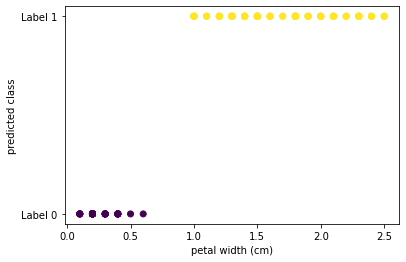

In [ ]:
one_r = DecisionTreeClassifier(max_depth=1, criterion="entropy")
one_r.fit(X, y)
dt_gini = DecisionTreeClassifier(max_depth=None) #, criterion="entropy")
dt_gini.fit(X, y)
dt_IG = DecisionTreeClassifier(max_depth=None, criterion="entropy")
dt_IG.fit(X, y)

one_r_acc = one_r.score(X, y)
dt_gini_acc = dt_gini.score(X, y)
dt_IG_acc = dt_IG.score(X, y)
print("Information Gain/entropy: 1-R accuracy: {} DT Gini accuracy: {} DT IG accuracy: {}".format(one_r_acc, dt_gini_acc, dt_IG_acc))

importances = one_r.feature_importances_
max_index_r = np.argmax(importances)
best_feature_name_r = iris.feature_names[max_index_r]
print("1-R attribute: ",best_feature_name_r)

importances = dt_gini.feature_importances_
max_index_dt_gini = np.argmax(importances)
best_feature_name_dt_gini = iris.feature_names[max_index_dt_gini]
print("DT Gini attribute: ",best_feature_name_dt_gini)

importances = dt_IG.feature_importances_
max_index_dt_IG = np.argmax(importances)
best_feature_name_dt_IG = iris.feature_names[max_index_dt_IG]
print("DT IG attribute: ",best_feature_name_dt_IG)

ybar = one_r.predict(X)
best_feature = X[:, max_index]
plt.scatter(best_feature, ybar, c=ybar)
plt.xlabel(best_feature_name)
plt.yticks([0,1],['Label 0','Label 1'])
plt.ylabel('predicted class')
plt.show()

*Recall that entropy is $H(X) = -\sum p(x) \log p(x)$; Gini is defined similarly: $G(X) = 1 - \sum p(x)\times p(x)$*

*As we might expect from the similar formulae, whether we use the Gini coefficient or Information Gain makes little difference in this case: 1-R still chooses petal-width, and the Decision Tree still reproduces the training data exactly.*

## Exercise 4.

Read up on the implelentation of the KNN classifier in `sklearn.neighbors.KNeighborsClassifier` and the implementation of distance functions in `sklearn.neighbors.DistanceMetric`. Implement the KNN classifier 
- with Manhattan distance 
- inverse distance weighting
- K= 1 and 5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
    
knn1.fit(X, y)
knn5.fit(X, y)

print("1-NN score is", knn1.score(X, y))
print("5-NN score is", knn5.score(X, y))

1-NN score is 1.0
5-NN score is 0.9666666666666667


### Exercise 5
A better mechanism for evaluating a classifier is based on randomly partitioning the data into a
training set and test set (the “holdout” method). There is an in-built utility for this in scikit-learn ,
but it can be in one of two places:

In [ ]:
from sklearn.model_selection import train_test_split # Newer versions
#from sklearn.cross_validation import train_test_split # Older versions
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train: {} X_test: {} y_train: {} y_test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (112, 4) X_test: (38, 4) y_train: (112,) y_test: (38,)


- **(a)** Train the five classifiers (`0-R, 1-R, Decision Tree, 1NN and 5NN`) on the training data, rather than the full data set. score() is too specific to be used in most situations; another way to find the training accuracy is by comparing the predictions to the ground truth labels as follows:

```python
>>> from scikit-learn.metrics import accuracy_score
>>> accuracy_score(zero_R.predict(X_train),y_train))
```

- Calculate the accuracy of the classifiers on the held-out training data. How does it compare to the training accuracies you calculated before? Why is this?

In [ ]:
from sklearn.metrics import accuracy_score

zero_r.fit(X_train, y_train)
one_r.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn5.fit(X_train, y_train)

zr_acc = accuracy_score(zero_r.predict(X_train),y_train)
or_acc = accuracy_score(one_r.predict(X_train),y_train)
dt_acc = accuracy_score(dt.predict(X_train),y_train)
knn1_acc = accuracy_score(knn1.predict(X_train),y_train)
knn5_acc = accuracy_score(knn5.predict(X_train),y_train)

print('Train accuracies: \n 0-R: {}\n 1-R: {}\n DT: {}\n 1NN: {}\n 5NN: {}'.format(zr_acc, or_acc, dt_acc, knn1_acc, knn5_acc))

Train accuracies: 
 0-R: 0.36607142857142855
 1-R: 0.6517857142857143
 DT: 1.0
 1NN: 1.0
 5NN: 0.9910714285714286


- **(b)** Instead of calculating the accuracy with respect to the training set, train your classifiers on the training data (using `fit()`) and then evaluate them (by calculating accuracy) according to their predictions on the test data. How different are the training accuracies and test accuracies? Hypothesise what could be causing these differences.

In [ ]:
zr_acc = accuracy_score(zero_r.predict(X_test),y_test)
or_acc = accuracy_score(one_r.predict(X_test),y_test)
dt_acc = accuracy_score(dt.predict(X_test),y_test)
knn1_acc = accuracy_score(knn1.predict(X_test),y_test)
knn5_acc = accuracy_score(knn5.predict(X_test),y_test)

print('Test accuracies:\n 0-R: {}\n 1-R: {}\n DT: {}\n 1NN: {}\n 5NN: {}'.format(zr_acc, or_acc, dt_acc, knn1_acc, knn5_acc))

Test accuracies:
 0-R: 0.23684210526315788
 1-R: 0.7105263157894737
 DT: 0.9210526315789473
 1NN: 0.9210526315789473
 5NN: 0.9210526315789473


*The accuracy on the test data, which we didn't use to build our models, is - perhaps unsurprisingly - somewhat worse than the accuracy on the training data.*

*In the case of the Decision Tree, it is worthwhile to observe that the tree is not actually making perfect predictions, although on the whole, it is still pretty good*

- **(c)** By default, `train_test_split` uses 75% of the data as training, and 25% as test. This can be changed by passing an argument, for example, `test_size=0.5` means that we use 50% as training and 50% as test. Try some different values (perhaps multiple times) to see if you can observe the trade-off inherent in the model using this evaluation strategy.

- **Note** The default behaviour of `train_test_split` is that the remainder of the data is used as training; this too can be altered, if you wish.

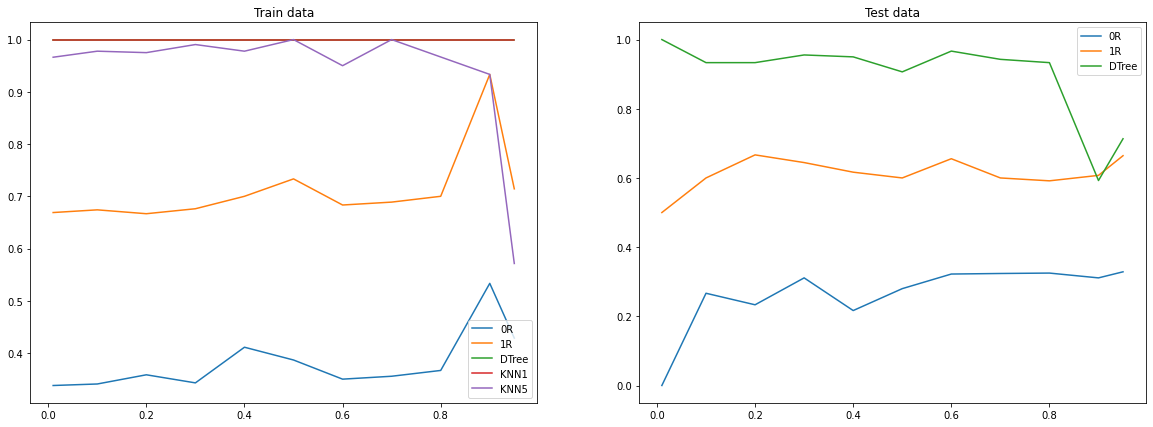

In [ ]:
zr_acc = []
or_acc = []
dt_acc = []
knn1_acc = []
knn5_acc = []

zr_t = []
or_t = []
dt_t = []

sz = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
for test_size in sz:
    #print('Running experiments with test set size: {}'.format(test_size))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    #print('X_train: {} X_test: {} y_train: {} y_test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    
    zero_r.fit(X_train, y_train)
    one_r.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    knn1.fit(X_train, y_train)
    knn5.fit(X_train, y_train)

    zr_acc.append(accuracy_score(zero_r.predict(X_train),y_train))
    or_acc.append(accuracy_score(one_r.predict(X_train),y_train))
    dt_acc.append(accuracy_score(dt.predict(X_train),y_train))
    knn1_acc.append(accuracy_score(knn1.predict(X_train),y_train))
    knn5_acc.append(accuracy_score(knn5.predict(X_train),y_train))

    zr_t.append(accuracy_score(zero_r.predict(X_test),y_test))
    or_t.append(accuracy_score(one_r.predict(X_test),y_test))
    dt_t.append(accuracy_score(dt.predict(X_test),y_test))

_,ax = plt.subplots(1,2,figsize=(20,7))
for yp in [zr_acc,or_acc,dt_acc,knn1_acc,knn5_acc]:
    ax[0].plot(sz,yp)
    ax[0].legend(['0R','1R','DTree','KNN1','KNN5'])
    ax[0].set_title('Train data')
for yp in [zr_t,or_t,dt_t]:
    ax[1].plot(sz,yp)
    ax[1].legend(['0R','1R','DTree'])
    ax[1].set_title('Test data')

*You might need to run this more than once to see how drastically the performance can change on the smaller test sets. For the larger test sets, the performance is rather consistent (in the sense that it is usually bad), but there isn't quite enough training data to build an accurate model.*

*We might also note that the training accuracy is almost better than the test accuracy for these classifiers; this is yet another reason to be suspicious of training accuracy (as it tends to **over-estimate** the **true performance** of our classifier).*

### Exercise 6.
*(Stratified)* `M–fold` cross-validation is so popular, `scikit-learn` has a utility that applies it directly.
For example, 10–fold cross-validation of the `0-R` classifier proceeds as follows:

```python
>>> from sklearn.model_validation import cross_val_score # Newer versions
>>> from sklearn.cross_validation import cross_val_score # Older versions
>>> cross_val_score(zero_R, X, y, cv=10)
```
**Note:** There are also simpler methods like `StratifiedKFold()` to generate the partitions, which you can then use to train and test the model yourself, if you wish.

- **(a)** This method returns an array of the calculated evaluation metric (by default, accuracy) across the folds. Write a wrapper function which averages these values, so as to come up with a single score for the classifier.

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(zero_r, X, y, cv=10))

def avg_score(clf, X, y, cv=10):
    scores = cross_val_score(clf, X, y, cv=cv)
    return np.mean(scores)   

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]


- **(b)** How does the estimate of the accuracy of the various classifiers using cross-validation compare to the training accuracies and holdout accuracies you calculated above?

In [ ]:
for clf in [zero_r, one_r, dt, knn1, knn5]:
    avg = avg_score(clf, X, y, cv=10)
    print(clf)
    print('Average CV accuracy', avg)
    print()

DummyClassifier(strategy='most_frequent')
Average CV accuracy 0.33333333333333337

DecisionTreeClassifier(criterion='entropy', max_depth=1)
Average CV accuracy 0.6666666666666667

DecisionTreeClassifier()
Average CV accuracy 0.96

KNeighborsClassifier(n_neighbors=1)
Average CV accuracy 0.96

KNeighborsClassifier()
Average CV accuracy 0.9666666666666668



*Interestingly, for our baseline classifiers, the CV accuracy is very much like the training accuracy - this occurs because of stratification. Arguably, holdout can be a little unfair for these methods because the class distribution can be different between the training and test sets, simply due to random chance.*

*As for the Decision Tree, the CV accuracy looks fairly similar to the test accuracy for many of the holdout split sizes. The main advantage is that this value doesn't tend to change quite as much as holdout test accuracy, if we repeat the procedure. A secondary advantage is that we don't need to try to justify why some particular holdout split size is appropriate - stratified 10-fold CV is just a "standard" strategy.*

*However, there are some trade-offs that might be considered when choosing the split size. Like in hold-out startegy we still need a balance between speed and having as many training examples as possible per split (10-fold is great for models that train quickly, but if training takes days I would tend to use 5-fold or less)*